In [1]:
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from PIL import Image
import json
from keras.models import model_from_json
import matplotlib.pyplot as plt
from PIL import Image
import face_recognition

In [2]:
face_cascade = cv2.CascadeClassifier('../../data/haarcascade_frontalface_default.xml')

In [ ]:
def openImageAndDetectFaces(path):
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image)
    try:
        print("I found {} face(s) in this photograph.".format(len(face_locations)))
        for face_location in face_locations:
            top, right, bottom, left = face_location
            face_image = image[top:bottom, left:right]
            face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
            pil_image = Image.fromarray(face_image)
            plt.imshow(pil_image)
            return new_size(pil_image)
    except ValueError as e:
        print(f"No face found")
        
        
def new_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=asarray(convert_from)/255
    return face

In [9]:
with open('fer.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('fer_model.h5')

Detecting faces in ../../data/nicola.jpeg
Face detected!
(48, 48)
Probs -> angry:0.00000 disgust:0.00000 fear:0.00019 happy:0.00000 sadness:0.00003 surprise:0.00135 neutral:0.99843


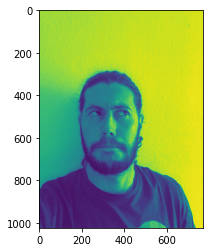

In [10]:
PIC = openImageAndDetectFaces("../../data/nicola.jpeg")
['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(PIC.shape)
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
print("Probs -> angry:{0:.5f} disgust:{1:.5f} fear:{2:.5f} happy:{3:.5f} sadness:{4:.5f} surprise:{5:.5f} neutral:{6:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5], pred2[6]))

In [4]:
df=pd.read_csv('../../data/songs_clean.csv')
df.head()

,Unnamed: 0,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,danceability,energy,acousticness,instrumentalness,liveness,neg,pos,neu,senti
0,1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,0.303,0.880,0.01170,0.00994,0.3470,0.036,0.294,0.670,angry
1,2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,0.845,0.652,0.00432,0.00723,0.4890,0.075,0.159,0.766,fear
2,3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,0.425,0.378,0.68900,0.00000,0.0664,0.093,0.155,0.752,nothing
3,4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,0.760,0.887,0.03700,0.00000,0.1380,0.363,0.051,0.586,happy
4,5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,Chapters,2019-04-26,urban contemporary,r&b,0.496,0.639,0.28000,0.00000,0.0975,0.138,0.175,0.687,disgust


## Take a random song of our database depends on image sentiment

In [ ]:
df[df["senti"]=="happy"].sample(n=1)

In [30]:
df[df["senti"]=="sadness"].sample(n=1).iloc[0]["track_name"]

'Feelings (feat. H.E.R.)'

Detecting faces in ../../data/ras.jpg
Face detected!
Today you are sadness. I recommend the song Bad Habits by The Federal Empire from the album  I Never Liked Your Friends. You can find in the Spotify playlist call Indie Poptimism


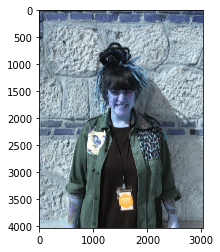

In [32]:
PIC = openImageAndDetectFaces("../../data/ras.jpg")
senti= ['angry', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'neutral']
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
feeling=senti[max(range(len(pred2)), key = lambda x: pred2[x])]
feeling_song= df[df["senti"]==feeling].sample(n=1)
song= feeling_song.iloc[0]["track_name"]
artist= feeling_song.iloc[0]["track_artist"]
album= feeling_song.iloc[0]["track_album_name"]
playlist= feeling_song.sample(n=1).iloc[0]["playlist_name"]

print(f'Today you are {senti[max(range(len(pred2)), key = lambda x: pred2[x])]}. I recommend the song {song} by {artist} from the album  {album}. You can find in the Spotify playlist call {playlist}')

## Get Youtube url of the song

#### Make the request to youtube

In [202]:
import urllib.request
from bs4 import BeautifulSoup

space=" "
query=(song + space + artist).replace(' ', '+')
url = f"https://www.youtube.com/results?search_query={query}" 
response = urllib.request.urlopen(url)
html = response.read()
soup = BeautifulSoup(html, 'html.parser')

In [203]:
url

'https://www.youtube.com/results?search_query=CASTLE+OF+GLASS+Linkin+Park'

#### Transform BeatifulSoup to string and get the id with regex

In [ ]:
web=str(soup.find("body"))
web=re.search(r'(videoId\"):(\"\w*\-?\w*)', web).group(2)
web=re.sub(r'[^\w]', ' ', web).split()[0]
final_url="https://www.youtube.com/watch?v="+web

In [197]:
web=re.search(r'(videoId\"):(\"\w*\-?\w*)', web).group(2)

In [198]:
web=re.sub(r'[^\w]', ' ', web).split()[0]

In [201]:
final_url="https://www.youtube.com/watch?v="+web

In [200]:
z

'https://www.youtube.com/watch?v=ScNNfyq3d_w'

In [ ]:
dumps(f'Today you are {senti[max(range(len(pred2)), key = lambda x: pred2[x])]}. I recommend the song {song} by {artist} from the album  {album}. You can find in the Spotify playlist call {playlist}')